In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
import seaborn as sns
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context # used this for loading the inbuilt datasets

In [ ]:
df = pd.read_csv('./data/car_crash_synthetic.csv')
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           50 non-null     object 
 1   total           50 non-null     float64
 2   alcohol         50 non-null     float64
 3   speeding        50 non-null     float64
 4   not_distracted  50 non-null     float64
 5   no_previous     50 non-null     float64
 6   ins_premium     50 non-null     float64
 7   ins_losses      50 non-null     float64
 8   abbrev          50 non-null     object 
dtypes: float64(7), object(2)
memory usage: 3.6+ KB


,State,total,alcohol,speeding,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,Alabama,18.2,5.8,7.1,15.4,11.5,790.1,145.0,AL
1,Alaska,15.3,4.3,6.5,14.2,10.9,820.4,139.8,AK
2,Arizona,17.0,5.5,7.0,15.2,12.2,775.2,138.3,AZ
3,Arkansas,16.1,4.9,6.2,14.0,10.6,730.8,133.5,AR
4,California,14.8,4.4,5.7,13.8,12.1,920.3,155.2,CA


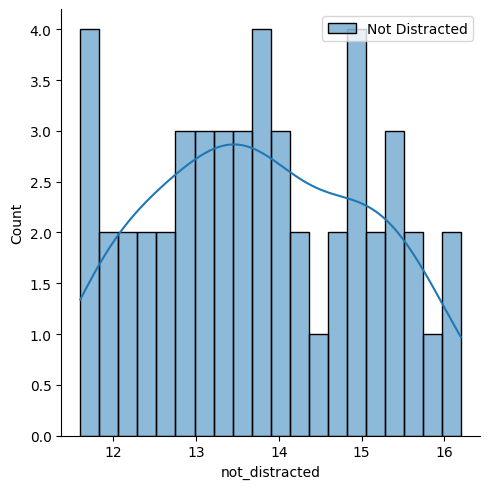

In [36]:

sns.displot(df['not_distracted'],kde= True,bins= 20,label='Not Distracted')
plt.legend()


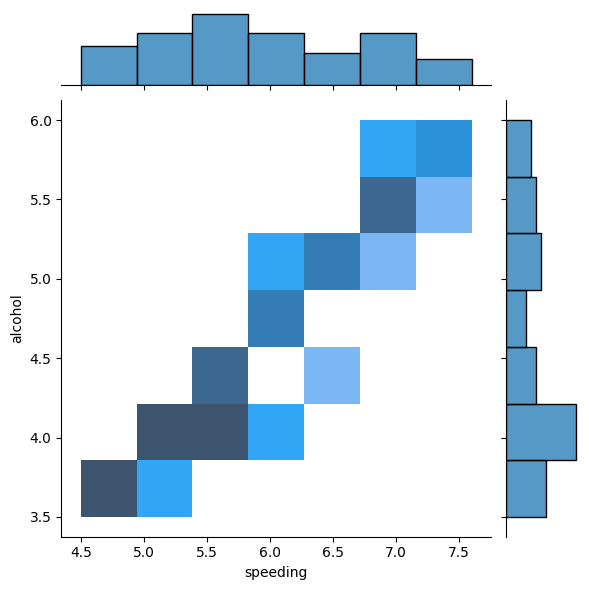

In [ ]:
sns.jointplot(df,x='speeding', y ='alcohol', kind='reg') # kind can be reg, hex, scatter, kde, hist

/var/folders/pm/9swc_rkd3gxfjt_55hy7qswr0000gp/T/ipykernel_11583/873792929.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['alcohol'],shade=False,label='Alcohol')


<Axes: xlabel='alcohol', ylabel='Density'>

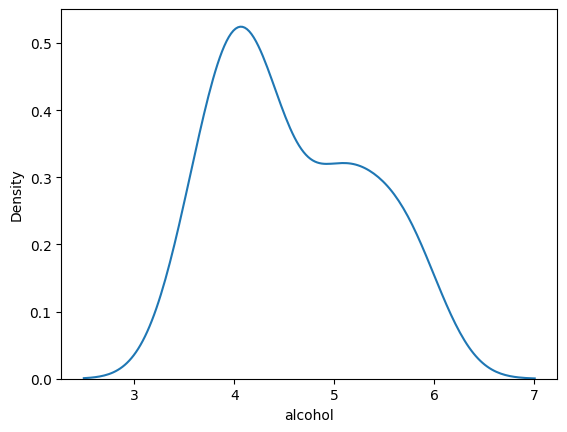

In [ ]:
sns.kdeplot(df['alcohol'],shade=False,label='Alcohol') # Kernel Density Estimate plot for alcohol consumption

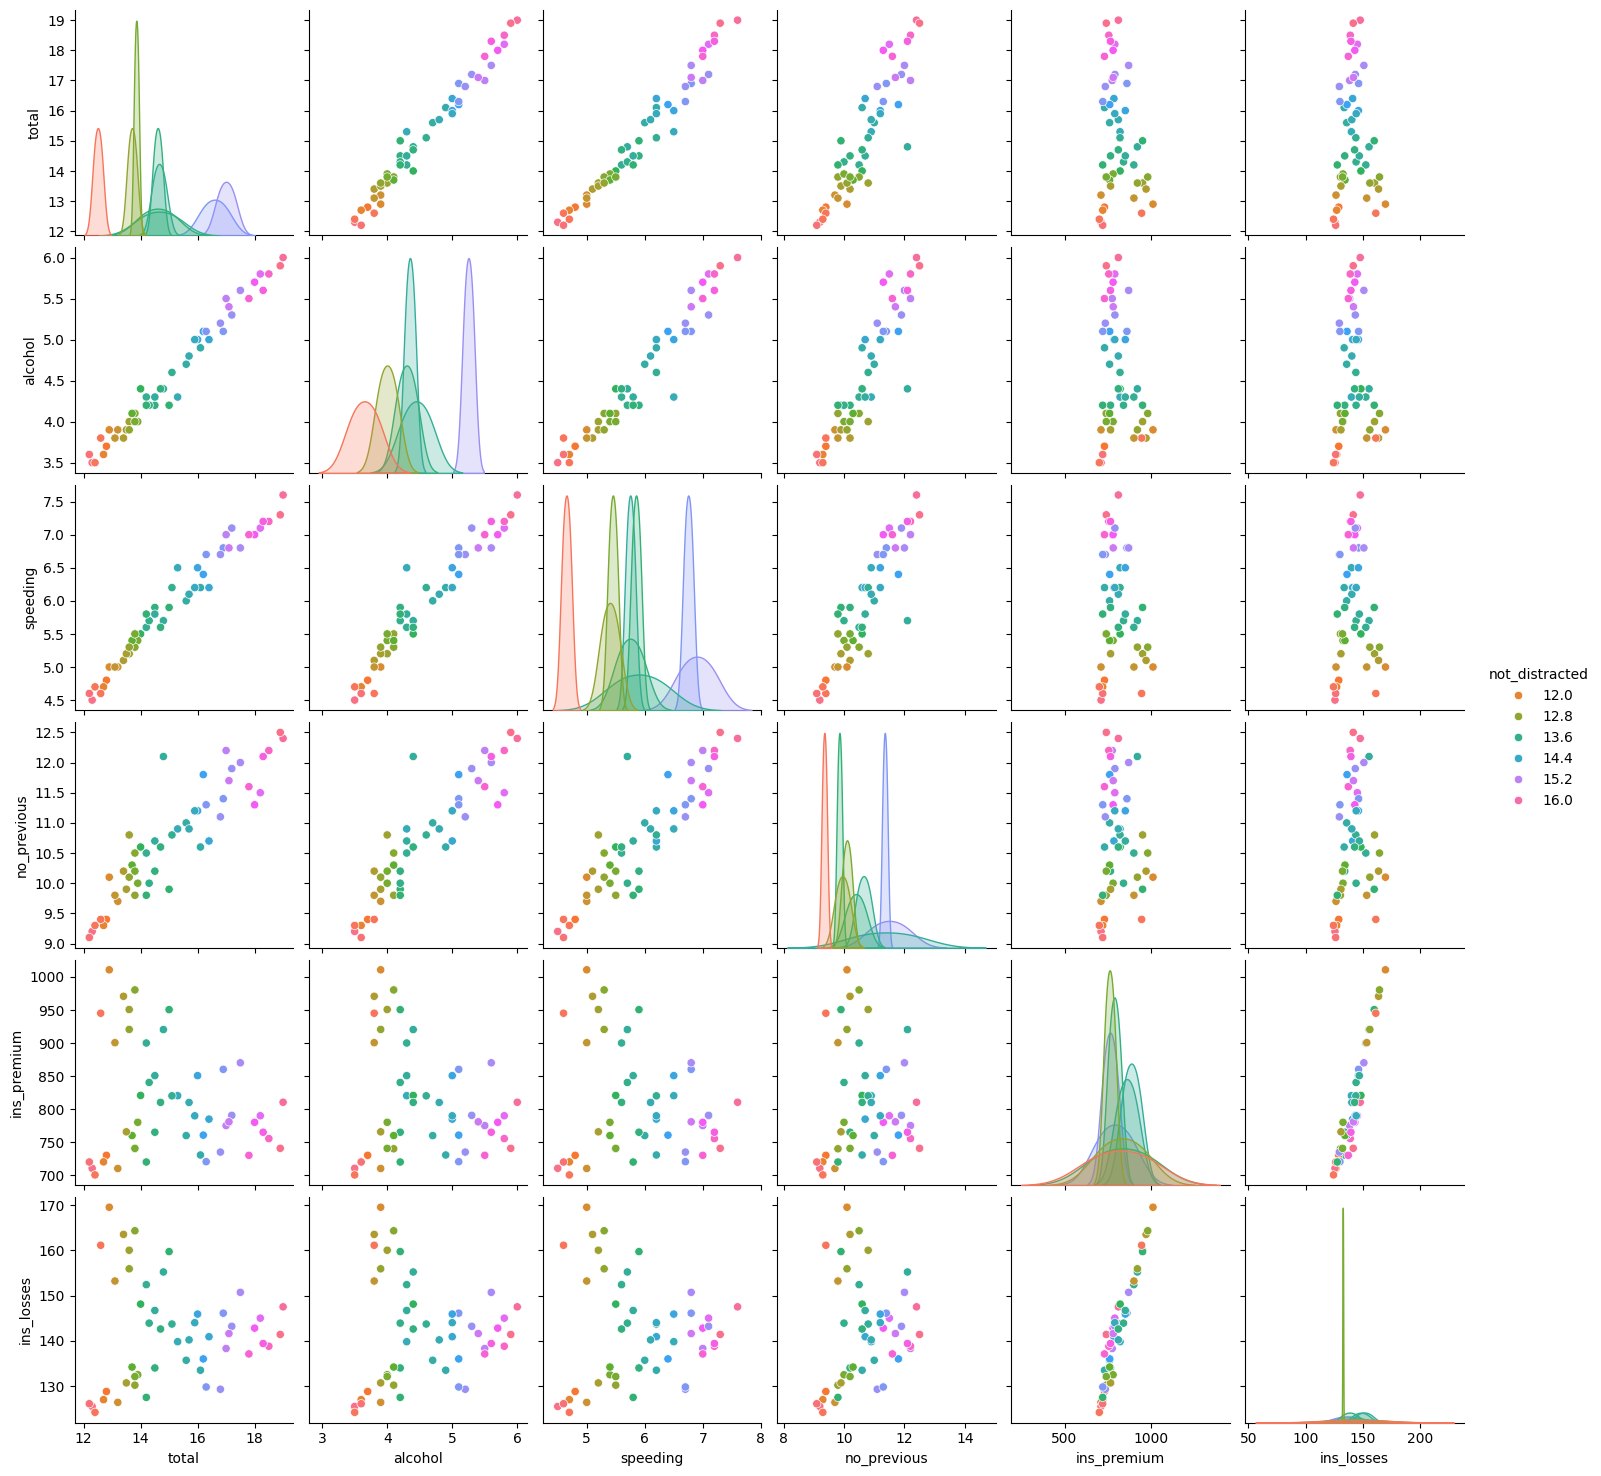

In [49]:
sns.pairplot(df,hue='not_distracted',palette='husl') # Pairplot of car crash dataset and hue does is that it colors the points by the 'not_distracted' column

Matrix Plot

<Axes: >

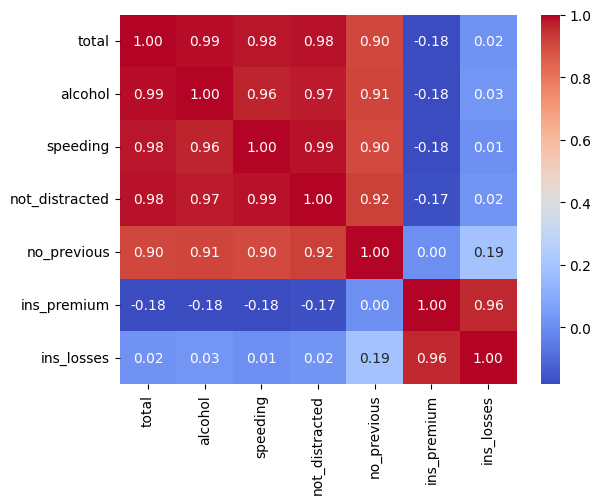

In [65]:
# Heat Map 
numeric = df.select_dtypes(include=[np.number]) # Select only numeric columns
final = numeric.corr() # Correlation matrix of the numeric columns

sns.heatmap(final,annot=True,fmt='.2f',cmap='coolwarm') # Heat map of the correlation matrix of the car crash dataset   

<Axes: xlabel='not_distracted', ylabel='State'>

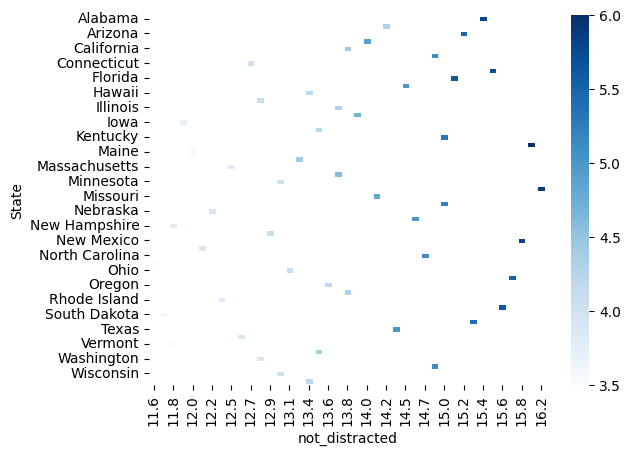

In [64]:
# Use above one or this 
crashes = df.pivot_table(index='State',columns='not_distracted',values='alcohol') # Pivot table to get the mean alcohol consumption per state for distracted and not distracted drivers
sns.heatmap(crashes,cmap='Blues',linecolor='white',linewidths=1) # Heat map of the mean alcohol consumption per state for distracted and not distracted drivers

<Axes: xlabel='year', ylabel='month'>

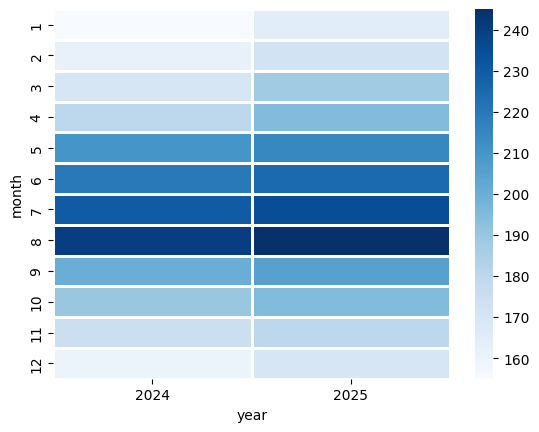

In [62]:
df2 = pd.read_csv('./data/flights_simple.csv')

flights = df2.pivot_table(index='month',columns='year',values='passengers') # Pivot table to get the number of passengers per month per year
sns.heatmap(flights,cmap='Blues',linecolor='white',linewidths=1) # Heat map of the number of passengers per month per year

<Axes: xlabel='alcohol', ylabel='Count'>

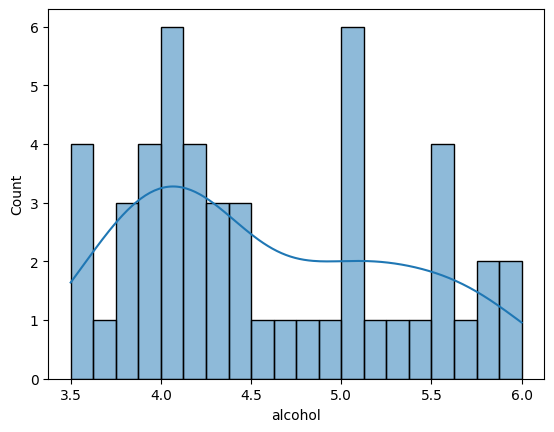

In [ ]:
sns.histplot(df['alcohol'],bins=20,kde=True) # Histogram of alcohol consumption with kernel density estimate